In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from tensorflow.python.data import Dataset
from sklearn import metrics

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [0]:
# Import training data and generate dataframe
Datalabel = ["age", "workclass", "fnlwgt" , "education","education-num" ,
             "marital-status","occupation", "relationship","race", "sex", 
             "capital-gain", "capital-loss", "hours-per-week","native-country",
             "income"]

url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, names = Datalabel, index_col = False, sep = ',\s',
                   na_values = ["?"], engine = 'python')

In [0]:
#Remove NaN value
data_clean = data.dropna()

In [4]:
data_clean.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
#function for one hot encodding and normalise data
def one_hot_encode(dataframe):
  label = ["workclass", "education", "marital-status", "occupation", 
           "relationship","race","income"]
  for name in label:
    function = LabelBinarizer()
    fit_function = function.fit_transform(dataframe[name])
    data_frame_name = name+"_onehot"
    data_frame_name = pd.DataFrame(fit_function, columns = [name+"_"+str(int(i)) for i in range(fit_function.shape[1])], 
                                  index = dataframe.index)
    dataframe = pd.concat([dataframe, data_frame_name], axis = 1)
  dataframe["sex_0"] = dataframe["sex"].apply(lambda x: 1.0 if x == "Male" else 0.0)
  dataframe["sex_1"] = dataframe["sex"].apply(lambda x: 1.0 if x == "Female" else 0.0)
  dataframe["log_fnlwgt"] = dataframe["fnlwgt"].apply(lambda x: np.log(x))
  dataframe["log_education-num"] = dataframe["education-num"].apply(lambda x: np.log(x+1))
  dataframe["log_hours"] = dataframe["hours-per-week"].apply(lambda x: np.log(x+1))
  dataframe["log_gain"] = dataframe["capital-gain"].apply(lambda x: np.log(x+1))
  dataframe["log_loss"] = dataframe["capital-loss"].apply(lambda x: np.log(x+1))
  dataframe["log_age"] = dataframe["age"].apply(lambda x: np.log(x))
  return dataframe

data_hot_encoded = one_hot_encode(data_clean)

In [0]:
data_hot_encoded = data_hot_encoded.reindex(np.random.permutation(data_hot_encoded.index))

In [7]:
data_hot_encoded.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,marital-status_0,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,relationship_0,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,income_0,sex_0,sex_1,log_fnlwgt,log_education-num,log_hours,log_gain,log_loss,log_age
9320,34,Self-emp-not-inc,123429,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0,0.0,11.723421,2.302585,4.110874,0.000000,0.0,3.526361
25273,60,Private,109511,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0,0.0,11.603780,1.609438,3.713572,0.000000,0.0,4.094345
3448,50,Self-emp-not-inc,44368,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,15024,0,55,El-Salvador,>50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,10.700274,2.302585,4.025352,9.617471,0.0,3.912023
13167,34,Private,56150,11th,7,Never-married,Transport-moving,Unmarried,White,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1.0,0.0,10.935782,2.079442,3.713572,0.000000,0.0,3.526361
16947,34,Private,34848,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,4064,0,40,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1.0,0.0,10.458751,2.397895,3.713572,8.310169,0.0,3.526361


In [0]:
#Split data into training and validation
from sklearn.model_selection import train_test_split
training_data, validation_data = train_test_split(data_hot_encoded)

In [0]:
#Function to create a training example dataframe
def input_feature(dataframe):
  selected_dataframe = dataframe[["log_age",'log_fnlwgt', 'log_education-num',
       'log_gain', 'log_loss', 'log_hours',
       'workclass_0', 'workclass_1', 'workclass_2', 'workclass_3',
       'workclass_4', 'workclass_5', 'workclass_6', 'education_0',
       'education_1', 'education_2', 'education_3', 'education_4',
       'education_5', 'education_6', 'education_7', 'education_8',
       'education_9', 'education_10', 'education_11', 'education_12',
       'education_13', 'education_14', 'education_15', 'marital-status_0',
       'marital-status_1', 'marital-status_2', 'marital-status_3',
       'marital-status_4', 'marital-status_5', 'marital-status_6',
       'occupation_0', 'occupation_1', 'occupation_2', 'occupation_3',
       'occupation_4', 'occupation_5', 'occupation_6', 'occupation_7',
       'occupation_8', 'occupation_9', 'occupation_10', 'occupation_11',
       'occupation_12', 'occupation_13', 'relationship_0', 'relationship_1',
       'relationship_2', 'relationship_3', 'relationship_4', 'relationship_5',
       'race_0', 'race_1', 'race_2', 'race_3', 'race_4', 'sex_0', 'sex_1']]
  return selected_dataframe

In [0]:
#Function to create a training target dataframe
def output_feature(dataframe):
  output_dataframe = pd.DataFrame()
  output_dataframe["income_0"] = dataframe["income_0"]
  return output_dataframe

In [0]:
training_example = input_feature(training_data)
training_target = output_feature(training_data)
validation_example = input_feature(validation_data)
validation_target = output_feature(validation_data)

In [0]:
#Funtion to select data batch, repetation for input data 
def my_input_fn(features, targets, shuffle = True, batch_size = 1, num_epochs = None):
  features = {key:np.array(value) for key, value in dict(features).items()}
  ds = Dataset.from_tensor_slices((features, targets))
  ds = ds.batch(batch_size).repeat(num_epochs)
  
  if shuffle:
    ds = ds.shuffle(1000)
  
  feature_batch, label_batch = ds.make_one_shot_iterator().get_next()
  
  return feature_batch, label_batch

In [0]:
# Function to convert all value in numeric value
def construct_feature_column(input_feature):
  return set([tf.feature_column.numeric_column(my_feature) for my_feature in input_feature])

In [0]:
# Function to train data and return linear_classifier model 
def train_classifier_model(batch_size,
                          learning_rate,
                          steps,
                          training_examples,
                          training_targets,
                          validation_examples,
                          validation_targets):
  
  periods = 10
  steps_per_period = steps/periods
  
  my_optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  
  linear_classifier = tf.estimator.LinearClassifier(feature_columns=construct_feature_column(training_examples),
                                                   optimizer = my_optimizer)
  
  training_input_fn = lambda: my_input_fn(features = training_example,
                                         targets = training_target,
                                         batch_size = batch_size)
  
  predict_training_input_fn = lambda: my_input_fn(features = training_example,
                                                 targets = training_target,
                                                 shuffle = False,
                                                 num_epochs = 1)
  
  predict_validation_input_fn = lambda: my_input_fn(features = validation_example,
                                                   targets = validation_target,
                                                   shuffle = False,
                                                   num_epochs = 1)
  
  print("Training model...")
  print("LogLoss on(training_examples):")
  training_log_loss = []
  validation_log_loss = []
  
  for period in range(0, periods):
    linear_classifier.train(input_fn = training_input_fn,
                           steps = steps_per_period)
    
    training_probabilities = list(linear_classifier.predict(input_fn = predict_training_input_fn))
    training_probabilities = np.array([item["probabilities"] for item in training_probabilities])
    training_logloss = metrics.log_loss(training_targets, training_probabilities)
    
    validation_probabilities = list(linear_classifier.predict(input_fn = predict_validation_input_fn))
    validation_probabilities = np.array([item["probabilities"] for item in validation_probabilities])
    validation_logloss = metrics.log_loss(validation_targets, validation_probabilities)
    
    print ("Period %02d : %0.2f" %(period, training_logloss))
    training_log_loss.append(training_logloss)
    validation_log_loss.append(validation_logloss)
    
  print ("Final logloss(on validation) : %0.2f" %validation_logloss)
  print ("Model training finished")
  
  plt.ylabel("LogLoss")
  plt.xlabel("Period")
  plt.title("LogLoss Vs. Period")
  plt.tight_layout()
  plt.plot(training_log_loss, label = "training")
  plt.plot(validation_log_loss, label = "validation")
  plt.legend()
  
  return linear_classifier, validation_probabilities


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Training model...
LogLoss on(training_examples):
Period 00 : 0.42
Period 01 : 0.39
Period 02 : 0.38
Period 03 : 0.37
Period 04 : 0.36
Period 05 : 0.36
Period 06 : 0.36
Period 07 : 0.36
Period 08 : 0.36
Period 09 : 0.35
Final logloss(on validation) : 0.35
Model training finished


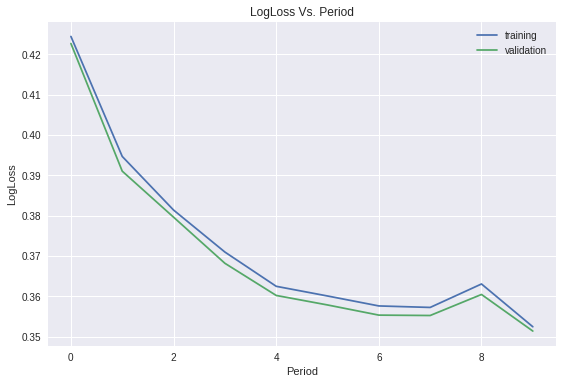

In [15]:
# Period wise logloss error
linear_classifier, validation_probabilities = train_classifier_model(learning_rate = 0.005,
                                          steps = 800,
                                          batch_size = 20,
                                          training_examples = training_example,
                                          training_targets = training_target,
                                          validation_examples = validation_example,
                                          validation_targets = validation_target)

In [16]:
# To check a AUC and Accuracy for validation data
predict_validation_input_fn = lambda: my_input_fn(validation_example, validation_target, shuffle = False, num_epochs = 1)
evaluation_metrics = linear_classifier.evaluate(input_fn= predict_validation_input_fn)
print ("Auc on validation set: %0.2f" %evaluation_metrics['auc'])
print ("Accuracy on validation set: %0.2f" %evaluation_metrics['accuracy'])

Auc on validation set: 0.89
Accuracy on validation set: 0.83


In [0]:
# To generate False_positive_rate, true_positive_rate and thresholds 
validation_results = []
for i in range(len(validation_probabilities)):
  results = validation_probabilities[i][1]
  validation_results.append(results)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(validation_target, validation_results)

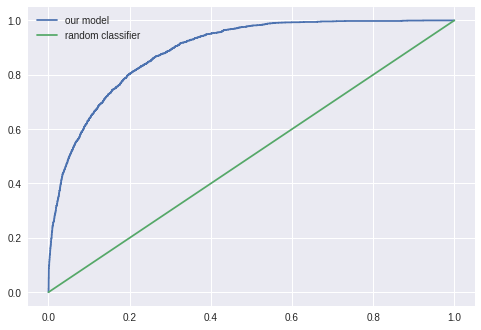

In [18]:
# Plot AUC 
plt.plot(false_positive_rate, true_positive_rate, label = "our model")
plt.plot([0,1], [0,1], label = "random classifier")
_=plt.legend(loc =2)

In [0]:
# Function to select trhresholds value
def evaluate_thresolds(threshold):
  print('Sensitivity:', true_positive_rate[thresolds > threshold][-1])
  print('Specificity:', 1 - false_positive_rate[thresolds > threshold][-1])

In [20]:
evaluate_thresolds(0.4)

Sensitivity: 0.6663179916317992
Specificity: 0.886303073370048


### Checking accuracy on test data 

In [0]:
# Importimg test data and generate test dataframe
test_url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/adult.test"
test_dataframe = pd.read_csv(test_url, names = Datalabel, index_col = False, sep = ',\s',
                   na_values = ["?"], engine = 'python', skiprows = 1)

In [22]:
# Drop NaN value from test dataframe and convert age column to integer
test_data_clean = test_dataframe.dropna()
test_data_clean["age"] = pd.to_numeric(test_data_clean["age"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
# Feature processing on test data
test_data_hot_encoded = one_hot_encode(test_data_clean)

In [24]:
test_data_hot_encoded.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,marital-status_0,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,occupation_0,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_7,occupation_8,occupation_9,occupation_10,occupation_11,occupation_12,occupation_13,relationship_0,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,income_0,sex_0,sex_1,log_fnlwgt,log_education-num,log_hours,log_gain,log_loss,log_age
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1.0,0.0,12.331833,2.079442,3.713572,0.000000,0.0,3.218876
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1.0,0.0,11.405496,2.302585,3.931826,0.000000,0.0,3.637586
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,12.727693,2.564949,3.713572,0.000000,0.0,3.332205
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1.0,0.0,11.984946,2.397895,3.713572,8.947546,0.0,3.784190
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,0.0,12.199516,1.945910,3.433987,0.000000,0.0,3.526361


In [0]:
# Convert test data into example and target
test_example = input_feature(test_data_hot_encoded)
test_target = output_feature(test_data_hot_encoded)

In [0]:
# Function to create a input data from the dataframe
def my_test_input_fn(features, batch_size= 1,num_epochs = 1):
  features = {key: np.array(value) for key, value in dict(features).items()}
  ds = Dataset.from_tensor_slices(features)
  ds = ds.batch(batch_size).repeat(num_epochs)
  features = ds.make_one_shot_iterator().get_next()
  return features

In [27]:
# Test probabilities based on linear_classifier model
test_input_fn = lambda: my_test_input_fn(test_example)
test_probabilities = linear_classifier.predict(input_fn = test_input_fn)
test_probabilities = np.array([item["probabilities"][1] for item in test_probabilities])
test_logloss_error = metrics.log_loss(test_target, test_probabilities)
print(test_logloss_error)

0.35029218246072535


In [0]:
test_probabilities_binary = np.where(test_probabilities > 0.4, 1, 0)
test_results = pd.DataFrame(data = test_probabilities_binary, index = test_example.index, columns = ["predictions"])

In [29]:
#Accuracy on test data
metrics.accuracy_score(test_target, test_results)

0.8304780876494023

In [0]:
final_dataframe = pd.concat([test_dataframe, test_results], axis = 1)
final_dataframe = final_dataframe.drop("income", axis = 1)

In [0]:
# Final invite list based on income >50K
invite_list = final_dataframe.loc[final_dataframe["predictions"] == 1]